# Analyzing Network Dynamics

In this project, I delve into the complexities of a vast big-data dataset to uncover meaningful insights and trends. By leveraging several visualization tools and techniques in Python, I transformed raw data into intuitive and compelling visual representations. The project aimed not only to present information but also to facilitate a deeper understanding of intricate patterns within the dataset. Through interactive visualizations, stakeholders gain the ability to explore and analyze data dynamically, fostering informed decision-making. This project not only showcases my proficiency in handling large datasets, but also demonstrates the power of visual storytelling in conveying complex information to a broad audience.

The data I worked with included firewall logs for a large corporation. By digging into the data and creating interactive visualizations, I was able to uncover certain security breaches during April of 2009.

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import os
import plotly.express as px
import networkx as nx

### Exploratory Data Analysis

In [ ]:
# read all firewall data into df
firewall_lst = []
for date_folder_name in [dir for dir in os.listdir(os.getcwd()) if dir.startswith('20')]:
    for file_name in os.listdir(os.path.join(os.getcwd(), date_folder_name, 'firewall', 'csv')):
        firewall_lst.append(pd.read_csv(os.path.join(os.getcwd(), date_folder_name, 'firewall', 'csv', file_name), low_memory=False))
df_firewall = pd.concat(firewall_lst)

In [ ]:
df_firewall.shape

(12942561, 15)

In [ ]:
df_firewall.head()

,Date/time,Syslog priority,Operation,Message code,Protocol,Source IP,Destination IP,Source hostname,Destination hostname,Source port,Destination port,Destination service,Direction,Connections built,Connections torn down
0,13/Apr/2011 08:52:52,Info,Built,ASA-session-6-302013,TCP,192.168.2.133,192.168.1.6,(empty),(empty),4873,135,epmap,inbound,1,0
1,13/Apr/2011 08:52:52,Info,Built,ASA-session-6-302013,TCP,192.168.2.133,192.168.1.6,(empty),(empty),4874,43025,43025_tcp,inbound,1,0
2,13/Apr/2011 08:52:52,Info,Built,ASA-session-6-302013,TCP,192.168.2.133,192.168.1.6,(empty),(empty),4875,43032,43032_tcp,inbound,1,0
3,13/Apr/2011 08:52:52,Info,Teardown,ASA-session-6-302014,TCP,192.168.2.133,192.168.1.6,(empty),(empty),4875,43032,43032_tcp,inbound,0,1
4,13/Apr/2011 08:52:52,Info,Built,ASA-session-6-302013,TCP,192.168.2.133,192.168.1.6,(empty),(empty),4876,135,epmap,inbound,1,0


In [ ]:
# convert timestamp to datetime
df_firewall['Date/time'] = pd.to_datetime(df_firewall['Date/time'])

df_firewall.head()

,Date/time,Syslog priority,Operation,Message code,Protocol,Source IP,Destination IP,Source hostname,Destination hostname,Source port,Destination port,Destination service,Direction,Connections built,Connections torn down
0,2011-04-13 08:52:52,Info,Built,ASA-session-6-302013,TCP,192.168.2.133,192.168.1.6,(empty),(empty),4873,135,epmap,inbound,1,0
1,2011-04-13 08:52:52,Info,Built,ASA-session-6-302013,TCP,192.168.2.133,192.168.1.6,(empty),(empty),4874,43025,43025_tcp,inbound,1,0
2,2011-04-13 08:52:52,Info,Built,ASA-session-6-302013,TCP,192.168.2.133,192.168.1.6,(empty),(empty),4875,43032,43032_tcp,inbound,1,0
3,2011-04-13 08:52:52,Info,Teardown,ASA-session-6-302014,TCP,192.168.2.133,192.168.1.6,(empty),(empty),4875,43032,43032_tcp,inbound,0,1
4,2011-04-13 08:52:52,Info,Built,ASA-session-6-302013,TCP,192.168.2.133,192.168.1.6,(empty),(empty),4876,135,epmap,inbound,1,0


In [ ]:
# drop 'Source hostname' and 'Destination hostname' columns because they have no values
df_firewall.drop(['Source hostname', 'Destination hostname'], axis=1, inplace=True)

df_firewall.head()

,Date/time,Syslog priority,Operation,Message code,Protocol,Source IP,Destination IP,Source port,Destination port,Destination service,Direction,Connections built,Connections torn down
0,2011-04-13 08:52:52,Info,Built,ASA-session-6-302013,TCP,192.168.2.133,192.168.1.6,4873,135,epmap,inbound,1,0
1,2011-04-13 08:52:52,Info,Built,ASA-session-6-302013,TCP,192.168.2.133,192.168.1.6,4874,43025,43025_tcp,inbound,1,0
2,2011-04-13 08:52:52,Info,Built,ASA-session-6-302013,TCP,192.168.2.133,192.168.1.6,4875,43032,43032_tcp,inbound,1,0
3,2011-04-13 08:52:52,Info,Teardown,ASA-session-6-302014,TCP,192.168.2.133,192.168.1.6,4875,43032,43032_tcp,inbound,0,1
4,2011-04-13 08:52:52,Info,Built,ASA-session-6-302013,TCP,192.168.2.133,192.168.1.6,4876,135,epmap,inbound,1,0


In [ ]:
# find distinct values of 'Connections built' and 'Connections torn down' for each operation
df_firewall.groupby('Operation').agg({'Connections built': 'unique', 'Connections torn down': 'unique'})

,Connections built,Connections torn down
Operation,,
(empty),[0],[0]
Built,[1],[0]
Deny,[0],[0]
Received ARP request collision,[0],[0]
Teardown,[0],[1]
permitted,[0],[0]


In [ ]:
# drop 'Connections built' and 'Connections torn down' columns because they express the same thing as 'Operation' column
df_firewall.drop(['Connections built', 'Connections torn down'], axis=1, inplace=True)

df_firewall.head()

,Date/time,Syslog priority,Operation,Message code,Protocol,Source IP,Destination IP,Source port,Destination port,Destination service,Direction
0,2011-04-13 08:52:52,Info,Built,ASA-session-6-302013,TCP,192.168.2.133,192.168.1.6,4873,135,epmap,inbound
1,2011-04-13 08:52:52,Info,Built,ASA-session-6-302013,TCP,192.168.2.133,192.168.1.6,4874,43025,43025_tcp,inbound
2,2011-04-13 08:52:52,Info,Built,ASA-session-6-302013,TCP,192.168.2.133,192.168.1.6,4875,43032,43032_tcp,inbound
3,2011-04-13 08:52:52,Info,Teardown,ASA-session-6-302014,TCP,192.168.2.133,192.168.1.6,4875,43032,43032_tcp,inbound
4,2011-04-13 08:52:52,Info,Built,ASA-session-6-302013,TCP,192.168.2.133,192.168.1.6,4876,135,epmap,inbound


In [ ]:
# drop duplicates
df_firewall.drop_duplicates(inplace=True)
df_firewall.shape

(12745197, 11)

In [ ]:
df_firewall.to_csv('firewall.csv', index=False)

# Visualizations

## Percentage of Firewall Activities by 2-Hour Intervals for Each Day in Bars

In [ ]:
df_grouped = df_firewall.resample('2H', on='Date/time').apply(lambda x: x.groupby('Syslog priority').size())

# Create 'hour' column with 2-hour intervals
df_firewall['hour'] = df_firewall['Date/time'].dt.hour // 2 * 2

df_grouped = df_firewall.groupby([df_firewall['Date/time'].dt.date, 'hour', 'Syslog priority']).size().reset_index(name='Count')

df_grouped['Date/time'] = pd.to_datetime(df_grouped['Date/time'])
# Create a 'date' column as integer
df_grouped['date'] = df_grouped['Date/time'].dt.strftime('%Y%m%d').astype(int)

df_grouped['total'] = df_grouped.groupby(df_grouped['Date/time'].dt.date)['Count'].transform('sum')

df_grouped['percentage'] = df_grouped['Count'] / df_grouped['total']

df_grouped.head()

,Date/time,hour,Syslog priority,Count,date,total,percentage
0,2011-04-13,8,Info,83408,20110413,10268741,0.008123
1,2011-04-13,8,Warning,195,20110413,10268741,0.000019
2,2011-04-13,10,Info,2925101,20110413,10268741,0.284855
3,2011-04-13,10,Warning,76,20110413,10268741,0.000007
4,2011-04-13,12,Info,7128033,20110413,10268741,0.694149


In [ ]:
# Create a selection slider
select_date = alt.param(
    value = 20110413,
    bind=alt.binding_range(min=df_grouped['date'].min(),
                           max=df_grouped['date'].max(),
                           step=1, name="Date")
)

alt.Chart(df_grouped).mark_bar().encode(
    x='hour:O',
    y=alt.Y('sum(percentage):Q', scale=alt.Scale(domain=(0, 0.7))),
).add_params(
    select_date
).transform_filter(
    alt.datum.date == select_date
).properties(
    width=600,
    height=400,
    title='Percentage of Firewall Activities by 2-Hour Intervals for Each Day'
)

alt.Chart(...)

## Percentage of Firewall Activities by Operations Each Day in Pie Chart

In [ ]:
df_grouped = df_firewall.resample('2H', on='Date/time').apply(lambda x: x.groupby('Operation').size())

df_grouped = df_firewall.groupby([df_firewall['Date/time'].dt.date, 'hour', 'Operation']).size().reset_index(name='Count')

df_grouped['Date/time'] = pd.to_datetime(df_grouped['Date/time'])
# Create a 'date' column as integer
df_grouped['date'] = df_grouped['Date/time'].dt.strftime('%Y%m%d').astype(int)

df_grouped['total'] = df_grouped.groupby(df_grouped['Date/time'].dt.date)['Count'].transform('sum')

df_grouped['percentage'] = df_grouped['Count'] / df_grouped['total']

df_grouped.head()

,Date/time,hour,Operation,Count,date,total,percentage
0,2011-04-13,8,(empty),204,20110413,10268741,0.000020
1,2011-04-13,8,Built,29668,20110413,10268741,0.002889
2,2011-04-13,8,Deny,27727,20110413,10268741,0.002700
3,2011-04-13,8,Teardown,26004,20110413,10268741,0.002532
4,2011-04-13,10,(empty),91,20110413,10268741,0.000009


In [ ]:
# pie chart
alt.Chart(df_grouped).mark_arc().encode(
    theta='sum(percentage):Q',
    color= alt.Color(
        'Operation:N',
        scale=alt.Scale(domain = ['Built','Teardown','Deny','Received ARP request collision','permitted'], range = ['#FF5733', '#33FF57', '#3357FF', '#F833FF', '#33FFF8'])
    ),
    tooltip=['Operation', 'sum(percentage):Q']
).add_params(
    select_date
).transform_filter(
    alt.datum.date == select_date
).properties(
    width=600,
    height=400,
    title='Percentage of Firewall Activities by Operation for Each Day'
)

alt.Chart(...)

## Number of Firewall Activities by Minutes in Line Chart

In [ ]:
df_group1 = df_firewall.resample('T', on='Date/time').count().reset_index()

df_group1['Date/time'] = pd.to_datetime(df_group1['Date/time'])
fig = px.line(df_group1, x='Date/time', y='Syslog priority')

fig.update_layout(
    title='Number of Firewall Activities by Minutes in Line Chart',
    xaxis_title='Date/Time',
    yaxis_title='Number of Events',
    legend_title='Number of Events'
)

fig.show()

## Percentage of Firewall Activities by Protocol Each Day in Pie Chart

In [ ]:
df_group2 = df_firewall.groupby('Protocol').agg({'Operation':'count'}).reset_index()
df_group2['Count'] = df_group2['Operation']
df_group2.drop('Operation', axis=1, inplace=True)
df_group2

,Protocol,Count
0,(empty),1919
1,ICMP,99564
2,TCP,12405354
3,UDP,238360


In [ ]:
alt.Chart(df_group2).mark_arc().encode(
    theta='Count:Q',
    color='Protocol:N',
    tooltip=['Protocol', 'Count:Q']
).properties(
    width=600,
    height=400,
    title='Number of Firewall Activities by Protocol in Pie Chart'
)

alt.Chart(...)

## Interaction of Source and Destination IP Addresses in a Directed Graph

In [ ]:
G = nx.from_pandas_edgelist(df_firewall, 'Source IP', 'Destination IP', create_using=nx.DiGraph())

# Count number of occurrences of each edge
edge_counts = {}
for (u, v) in G.edges():
    if (u, v) in edge_counts:
        edge_counts[(u, v)] += 1
    else:
        edge_counts[(u, v)] = 1

# Set edge weights based on counts
for (u, v) in G.edges():
    G.edges[u, v]['weight'] = edge_counts[(u, v)]

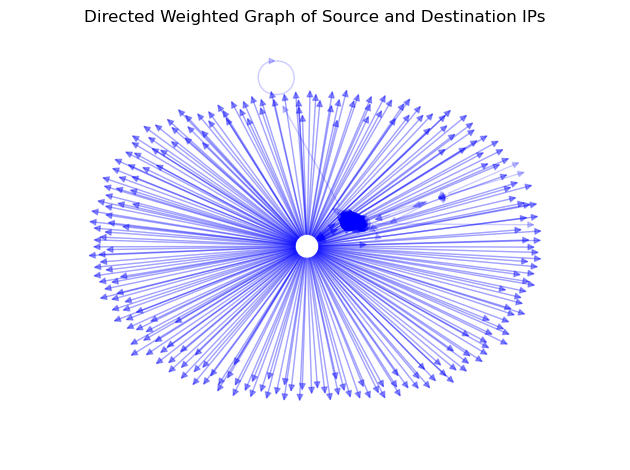

In [ ]:
pos = nx.spring_layout(G, seed=7)
nx.draw_networkx_edges(G, pos, edgelist=edge_counts, width=1, alpha=0.2, edge_color="b")
#nx.draw_networkx_labels(G, pos, font_size=5, font_family="sans-serif")
edge_labels = nx.get_edge_attributes(G, "weight")
#nx.draw_networkx_edge_labels(G, pos, edge_labels)

import matplotlib.pyplot as plt

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.title("Directed Weighted Graph of Source and Destination IPs")
plt.tight_layout()
plt.show()